In [1]:
%matplotlib inline

import matplotlib.pyplot as mpl
import copy
import random as rd

In [2]:
import numpy as np
from numpy import exp, log
from numpy.random import random, beta


class ArmBernoulli():
    """Bernoulli arm"""
    def __init__(self, p):
        """
        p: Bernoulli parameter
        """
        self.p = p
        self.mean = p
        self.var = p * (1 - p)
        
    def sample(self):
        reward = random() < self.p
        return reward


class ArmBeta():
    """arm having a Beta distribution"""
    def __init__(self, a, b):
        """
        a: first beta parameter
        b: second beta parameter
        """
        self.a = a
        self.b = b
        self.mean = a / (a + b)
        self.var = (a * b) / ((a + b) ** 2 * (a + b + 1))
        
    def sample(self):
        reward = beta(self.a, self.b)
        return reward


class ArmExp():
    """arm with trucated exponential distribution"""
    def __init__(self, lambd):
        """
        lambd: parameter of the exponential distribution
        """
        self.lambd = lambd
        self.mean = (1 / lambd) * (1 - exp(-lambd))
        self.var = 1 # compute it yourself!
        
    def sample(self):
        reward = min(-1 / self.lambd * log(random()), 1)
        return reward


def simu(p):
    """
    draw a sample of a finite-supported distribution that takes value
    k with porbability p(k)
    p: a vector of probabilities
    """
    q = p.cumsum()
    u = random()
    i = 0
    while u > q[i]:
        i += 1
        if i >= len(q):
            raise ValueError("p does not sum to 1")
    return i


class ArmFinite():
    """arm with finite support"""
    def __init__(self, X, P):
        """
        X: support of the distribution
        P: associated probabilities
        """
        self.X = np.array(X)
        self.P = np.array(P)
        self.mean = (self.X * self.P).sum()
        self.var = (self.X ** 2 * self.P).sum() - self.mean ** 2
        
    def sample(self):
        i = simu(self.P)
        reward = self.X[i]
        return reward

In [3]:
# Build your own bandit problem 

# this is an example, please change the parameters or arms!
Arm1=ArmBernoulli(0.3)
Arm2=ArmBernoulli(0.25)
Arm3=ArmBernoulli(0.2)
Arm4=ArmBernoulli(0.1)

MAB=[Arm1,Arm2,Arm3,Arm4]

# bandit : set of arms

NbArms=len(MAB)

Means=np.zeros([NbArms])
for i in range(NbArms):
    Means[i]=MAB[i].mean

# Display the means of your bandit (to find the best)
print(Means)
muMax=max(Means);


[ 0.3   0.25  0.2   0.1 ]


In [4]:
def UCB(T,MAB):
    
    NbArms=len(MAB)

    rew = np.empty([0])
    draws = np.empty([0])
    
    Means=np.zeros([NbArms])
    for i in range(NbArms):
        Means[i]=MAB[i].mean
        draws = np.append(draws, i)
        
    N = np.ones([NbArms])    
    S = [MAB[i].sample() for i in range(NbArms)]
    rew = np.append(rew, S)
    mu = copy.copy(S)
    
    for t in range(NbArms,T):
        
        A = np.argmax([mu[a]+np.sqrt(np.log(t)/(2*N[a])) for a in range(NbArms)])
        
        draws = np.append(draws, A)
        rew = np.append(rew, MAB[A].sample())
        N[A] += 1
        S[A] += rew[-1]
        mu[A] = S[A]/N[A]
        
    
    return rew,draws,N,S,mu

In [5]:
# # Comparison of the regret on one run of the bandit algorithm

# T=5000; # horizon

# [rew1,draws1]=UCB(T,MAB);
# reg1=muMax*np.array(range(1,T+1)) - cumsum(rew1);
# [rew2,draws2]=TS(T,MAB);
# reg2=muMax*np.array(range(1,T+1)) - cumsum(rew2);


# plot(np.array(range(1,T+1)),reg1,np.array(range(1,T+1)),reg2)


# #(Expected) regret curve for UCB and Thompson Sampling


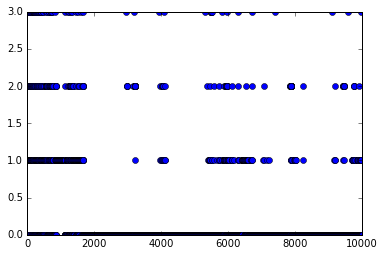

In [6]:
mpl.plot(UCB(10000,MAB)[1],'o')

In [7]:
def TS(T,MAB):
    
    NbArms=len(MAB)

    rew = np.empty([0])
    draws = np.empty([0])
    
    Means=np.zeros([NbArms])
    for i in range(NbArms):
        Means[i]=MAB[i].mean
        draws = np.append(draws, i)
        
    N = np.ones([NbArms])    
    S = [MAB[i].sample() for i in range(NbArms)]
    rew = np.append(rew, S)
    mu = copy.copy(S)
    
    for t in range(NbArms,T):
        
        A = np.argmax([np.random.beta(S[a]+1,N[a]-S[a]+1) for a in range(NbArms)])
        
        draws = np.append(draws, A)
        rew = np.append(rew, MAB[A].sample())
        N[A] += 1
        S[A] += rew[-1]
        mu[A] = S[A]/N[A]
        
    
    return rew,draws,N,S,mu

In [8]:
TS(1000,MAB)[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
        1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1

In [9]:
def ran(T,MAB):
    
    NbArms=len(MAB)

    rew = np.empty([0])
    draws = np.empty([0])
    
    Means=np.zeros([NbArms])
    for i in range(NbArms):
        Means[i]=MAB[i].mean
        draws = np.append(draws, i)
        
    N = np.ones([NbArms])    
    S = [MAB[i].sample() for i in range(NbArms)]
    rew = np.append(rew, S)
    mu = copy.copy(S)
    
    for t in range(NbArms,T):
        
        A = np.argmax(mu)
        
        draws = np.append(draws, A)
        rew = np.append(rew, MAB[A].sample())
        N[A] += 1
        S[A] += rew[-1]
        mu[A] = S[A]/N[A]
        
    
    return rew,draws,N,S,mu

In [10]:
def regret(Tmax, MAB):
    
    regTS = np.empty([0])
    regUCB = np.empty([0])
    regRan = np.empty([0])
    
    pet = max([MAB[i].mean for i in range(len(MAB))])
    drawsTS = TS(Tmax,MAB)[1]
    drawsUCB = UCB(Tmax,MAB)[1]
    drawsRan = ran(Tmax,MAB)[1]
    
    for T in range(Tmax):
        regTS = np.append(regTS,T*pet - np.sum([MAB[int(drawsTS[t])].mean for t in range(T)]))
        regUCB = np.append(regUCB,T*pet - np.sum([MAB[int(drawsUCB[t])].mean for t in range(T)]))
        regRan = np.append(regRan,T*pet - np.sum([MAB[int(drawsRan[t])].mean for t in range(T)]))
    
    mpl.figure(figsize=(20,10))
    mpl.plot(regTS, label="TS")
    mpl.plot(regUCB, label="UCB")
#     mpl.plot(regRan, label="Naive")
    mpl.plot([C(MAB)*np.log(t) for t in range(1,Tmax)], label="Oracle")
    mpl.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    mpl.show()

In [11]:
Arm1=ArmBernoulli(0.9)
Arm2=ArmBernoulli(0.58)
Arm3=ArmBernoulli(0.4)
Arm4=ArmBernoulli(0.1)

MAB=[Arm1,Arm2,Arm3,Arm4]

# bandit : set of arms

NbArms=len(MAB)

Means=np.zeros([NbArms])
for i in range(NbArms):
    Means[i]=MAB[i].mean

# Display the means of your bandit (to find the best)
print(Means)
muMax=max(Means);

[ 0.9   0.58  0.4   0.1 ]


In [12]:
def C(MAB):
    
    pet = max([MAB[i].mean for i in range(len(MAB))])
    Aet = np.argmax([MAB[i].mean for i in range(len(MAB))])
    
    kl = lambda x,y : x*np.log(x/y) + (1-x)*np.log((1-x)/(1-y))
#     print([kl(MAB[i].mean,pet) for i in np.delete(range(len(MAB)), Aet)])
    return np.sum([(pet-MAB[i].mean)/kl(MAB[i].mean,pet) for i in np.delete(range(len(MAB)), Aet)])

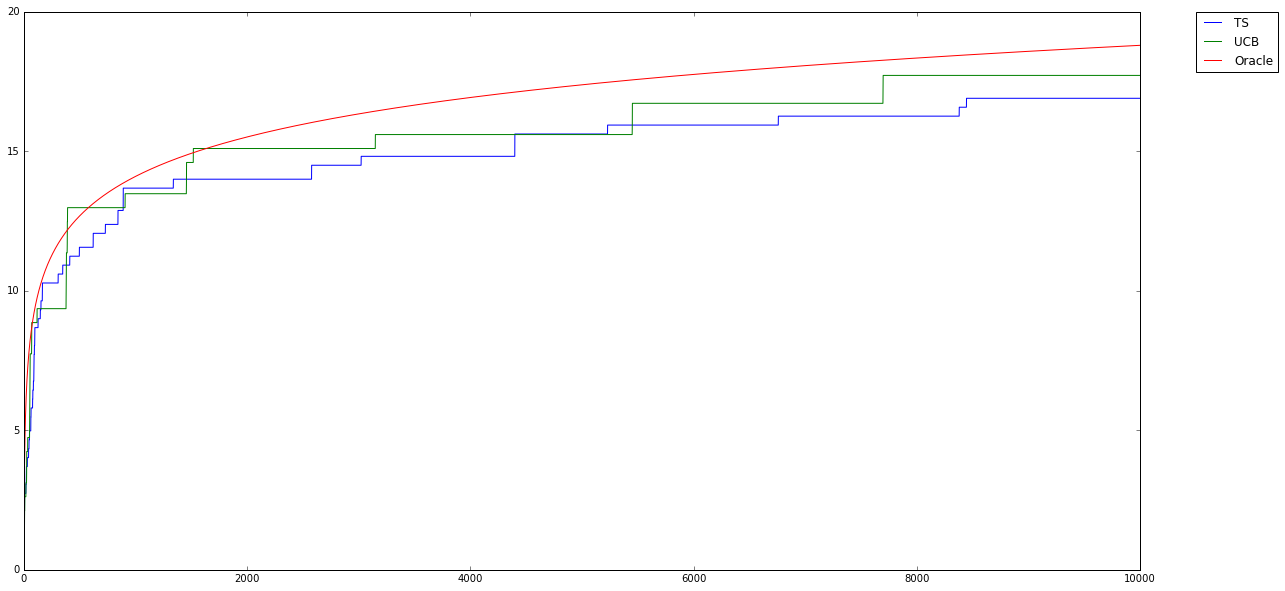

In [13]:
regret(10000,MAB)

In [14]:
C(MAB)

2.0409762316864746

In [25]:
def TSgen(T,MAB):
    
    NbArms=len(MAB)

    rew = np.empty([0])
    draws = np.empty([0])
    
    Means=np.zeros([NbArms])
    for i in range(NbArms):
        Means[i]=MAB[i].mean
        draws = np.append(draws, i)
        
    N = np.ones([NbArms])    
    S = [MAB[i].sample() for i in range(NbArms)]
    rew = np.append(rew, S)
    mu = copy.copy(S)
    
    for t in range(NbArms,T):
        
        A = np.argmax([np.random.beta(S[a]+1,N[a]-S[a]+1) for a in range(NbArms)])
        
        draws = np.append(draws, A)
        rew = np.append(rew, MAB[A].sample())
        N[A] += 1
        if np.random.random() < rew[-1]:
            S[A] += 1
        mu[A] = S[A]/N[A]
        
    
    return rew,draws,N,S,mu

In [26]:
Arm1=ArmBeta(0.9,4)
Arm2=ArmBeta(0.58,5)
Arm3=ArmBeta(0.4,2)
Arm4=ArmBeta(0.1,8)

MAB=[Arm1,Arm2,Arm3,Arm4]

# bandit : set of arms

NbArms=len(MAB)

Means=np.zeros([NbArms])
for i in range(NbArms):
    Means[i]=MAB[i].mean

# Display the means of your bandit (to find the best)
print(Means)
muMax=max(Means);

[ 0.18367347  0.10394265  0.16666667  0.01234568]


In [33]:
def regretGen(Tmax, MAB):
    
    regTS = np.empty([0])
    regUCB = np.empty([0])
    regRan = np.empty([0])
    
    pet = max([MAB[i].mean for i in range(len(MAB))])
    drawsTS = TSgen(Tmax,MAB)[1]
    drawsUCB = UCB(Tmax,MAB)[1]
    drawsRan = ran(Tmax,MAB)[1]
    
    for T in range(Tmax):
        regTS = np.append(regTS,T*pet - np.sum([MAB[int(drawsTS[t])].mean for t in range(T)]))
        regUCB = np.append(regUCB,T*pet - np.sum([MAB[int(drawsUCB[t])].mean for t in range(T)]))
        regRan = np.append(regRan,T*pet - np.sum([MAB[int(drawsRan[t])].mean for t in range(T)]))
    
    mpl.figure(figsize=(20,10))
    mpl.plot(regTS, label="TS")
    mpl.plot(regUCB, label="UCB")
#     mpl.plot(regRan, label="Naive")
    mpl.plot([C(MAB)*np.log(t) for t in range(1,Tmax)], label="Oracle")
    mpl.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    mpl.show()

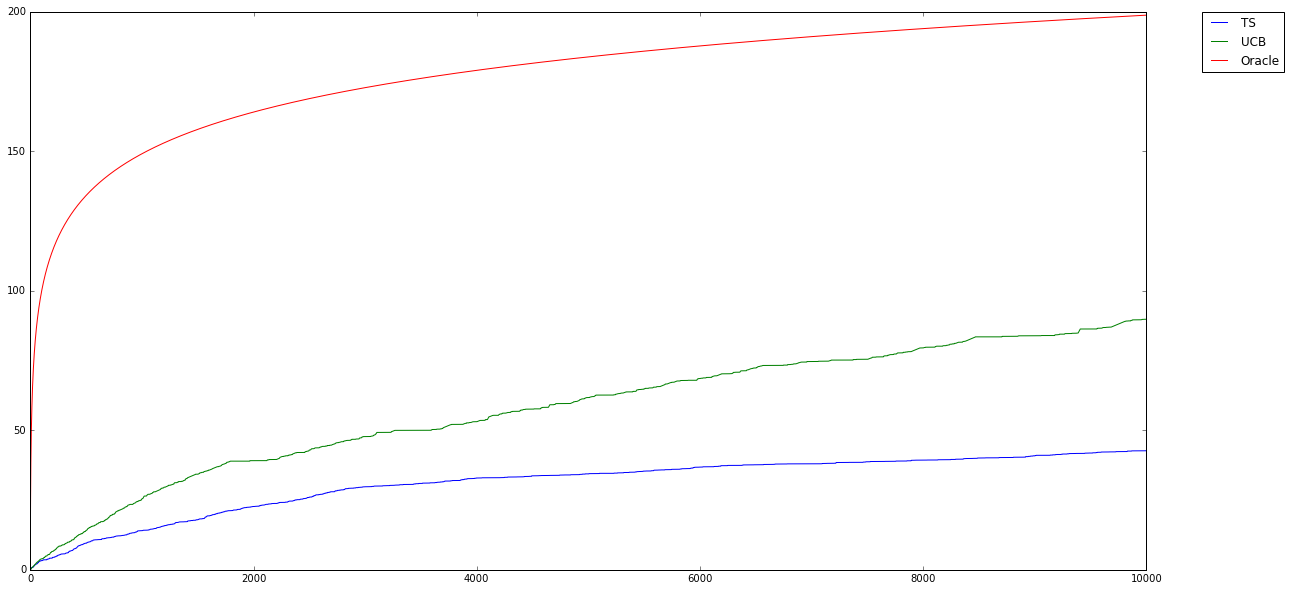

In [36]:
regretGen(10000,MAB)